#**Etude de santé publique** - *Food and Agriculture Organization of the United Nations*



# **Introduction**

In [ ]:
## Importation des modules & librairies
import numpy as np # Calculs numériques et opérations mathématiques
import pandas as pd # Manipulation et analyse de données
import matplotlib.pyplot as plt # Création de graphiques et visualisations
import seaborn as sns # Visualisation statistique avancée

In [ ]:
## Mise en place des fonctions
def explore_dataframe(data_to_analyse):
    """
    Effectue une analyse exploratoire basique sur un dataframe donné.

    Parameters:
    data_to_analyse (DataFrame): Le dataframe à analyser.
    """
    # Dimensions du dataframe
    print('*' * 40 + " DIMENSIONS " + '*' * 44)
    print(f"Le dataframe comporte {data_to_analyse.shape[1]} variable(s) pour {data_to_analyse.shape[0]} observation(s).")

    # Typologies des variables
    print('*' * 40 + " TYPOLOGIES " + '*' * 44)
    for col, dtype in data_to_analyse.dtypes.items():
        print(f"{col} : {dtype}")

    # Effectifs des variables
    print('*' * 40 + " EFFECTIFS " + '*' * 45)
    for col, count in data_to_analyse.describe(include='all').loc['count'].items():
        print(f"{col} : {count}")

    # Valeurs nulles dans le dataframe
    print('*' * 40 + " VALEURS NULLES " + '*' * 40)
    for col, count in data_to_analyse.isnull().sum().items():
        print(f"{col} : {count}")

    # Duplicats dans le dataframe
    print('*' * 40 + " DUPLICATS " + '*' * 45)
    for col, count in data_to_analyse[data_to_analyse.duplicated()].count().items():
        print(f"{col} : {count}")


In [ ]:
## Importation des données initiales
population = pd.read_csv('population.csv')
sousNutrition = pd.read_csv('sous_nutrition.csv')
dispoAlimentaire = pd.read_csv('dispo_alimentaire.csv')
aideAlimentaire = pd.read_csv('aide_alimentaire.csv')

# **Analyses exploratoires et préparation des données**

## Données relatives aux populations

In [ ]:
## Analyse exploratoire
explore_dataframe(population)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 3 variable(s) pour 1416 observation(s).
**************************************** TYPOLOGIES ********************************************
Zone : object
Année : int64
Valeur : float64
**************************************** EFFECTIFS *********************************************
Zone : 1416
Année : 1416.0
Valeur : 1416.0
**************************************** VALEURS NULLES ****************************************
Zone : 0
Année : 0
Valeur : 0
**************************************** DUPLICATS *********************************************
Zone : 0
Année : 0
Valeur : 0


In [ ]:
## Préparation des données

# Modifier le nom des variables
population.rename(columns = {"Zone" : "zone", "Année" : "annee", "Valeur": "population"}, inplace=True)

# Modifier la typologie des variables
population["population"] = population["population"].astype(int)
population["annee"] = population["annee"].astype(object)

# Mise à l'échelle de la variable population
population["population"] = population["population"] * 1000

# Aperçu du dataframe
population.head()

,zone,annee,population
0,Afghanistan,2013,32269000
1,Afghanistan,2014,33370000
2,Afghanistan,2015,34413000
3,Afghanistan,2016,35383000
4,Afghanistan,2017,36296000


## Données relatives aux disponibilités alimentaires

In [ ]:
## Analyse exploratoire
explore_dataframe(dispoAlimentaire)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 18 variable(s) pour 15605 observation(s).
**************************************** TYPOLOGIES ********************************************
Zone : object
Produit : object
Origine : object
Aliments pour animaux : float64
Autres Utilisations : float64
Disponibilité alimentaire (Kcal/personne/jour) : float64
Disponibilité alimentaire en quantité (kg/personne/an) : float64
Disponibilité de matière grasse en quantité (g/personne/jour) : float64
Disponibilité de protéines en quantité (g/personne/jour) : float64
Disponibilité intérieure : float64
Exportations - Quantité : float64
Importations - Quantité : float64
Nourriture : float64
Pertes : float64
Production : float64
Semences : float64
Traitement : float64
Variation de stock : float64
**************************************** EFFECTIFS *********************************************
Zone : 15605
Produit : 15605
Origine : 1560

In [ ]:
## Préparation des données

# Modifier le nom des variables
dispoAlimentaire.rename(columns = {
    "Zone"  : "zone",
    "Produit"  : "produit",
    "Origine"  : "origine",
    "Aliments pour animaux"  : "aliments_animaux_kg",
    "Autres Utilisations"  : "autres_utilisations_kg",
    "Disponibilité alimentaire (Kcal/personne/jour)"  : "dispo_kcal/personne/jour",
    "Disponibilité alimentaire en quantité (kg/personne/an)"  : "dispo_g/personne/jour",
    "Disponibilité de matière grasse en quantité (g/personne/jour)"  : "dispo_mat_grasse_g/personne/jour",
    "Disponibilité de protéines en quantité (g/personne/jour)"  : "dispo_prot_g/personne/jour",
    "Disponibilité intérieure"  : "dispo_interieure_kg",
    "Exportations - Quantité"  : "exportations_quantite_kg",
    "Importations - Quantité"  : "importations_quantite_kg",
    "Nourriture"  : "nourriture_kg",
    "Pertes"  : "pertes_kg",
    "Production"  : "production_kg",
    "Semences"  : "semences_kg",
    "Traitement"  : "traitement_kg",
    "Variation de stock"  : "variation_stock_kg",
}, inplace=True)

# Remplacement des valeurs nulles par "0"
dispoAlimentaire.fillna(0.0, inplace=True)

# Liste des variables cibles avant mise à l'échelle des unités de valeurs
variablesMilliersTonnes = [
    'variation_stock_kg',
    'traitement_kg',
    'semences_kg',
    'production_kg',
    'pertes_kg',
    'nourriture_kg',
    'importations_quantite_kg',
    'exportations_quantite_kg',
    'aliments_animaux_kg',
    'autres_utilisations_kg',
    'dispo_interieure_kg'
]

# Mise à l'échelle des unités de valeurs ( Tonnes -> Kilogrammes )
for column in dispoAlimentaire: # Pour chaque colonne du dataset
    if column in variablesMilliersTonnes: # Si la colonne doit être au format "Kilogramme
        for index, value in enumerate(dispoAlimentaire[column]): # Alors pour chaque valeur
            dispoAlimentaire.at[index, column] = value * 1000000 # * 1 000 000

# Calcul de la disponibilité en gramme, par jour et par personne
dispoAlimentaire['dispo_g/personne/jour'] = dispoAlimentaire['dispo_g/personne/jour'] / 365 * 1000

# Aperçu du dataframe
dispoAlimentaire.head()

,zone,produit,origine,aliments_animaux_kg,autres_utilisations_kg,dispo_kcal/personne/jour,dispo_g/personne/jour,dispo_mat_grasse_g/personne/jour,dispo_prot_g/personne/jour,dispo_interieure_kg,exportations_quantite_kg,importations_quantite_kg,nourriture_kg,pertes_kg,production_kg,semences_kg,traitement_kg,variation_stock_kg
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.712329,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


## Données relatives aux aides alimentaires

In [ ]:
## Analyse exploratoire
explore_dataframe(aideAlimentaire)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 4 variable(s) pour 1475 observation(s).
**************************************** TYPOLOGIES ********************************************
Pays bénéficiaire : object
Année : int64
Produit : object
Valeur : int64
**************************************** EFFECTIFS *********************************************
Pays bénéficiaire : 1475
Année : 1475.0
Produit : 1475
Valeur : 1475.0
**************************************** VALEURS NULLES ****************************************
Pays bénéficiaire : 0
Année : 0
Produit : 0
Valeur : 0
**************************************** DUPLICATS *********************************************
Pays bénéficiaire : 0
Année : 0
Produit : 0
Valeur : 0


In [ ]:
## Préparation des données

# Modifier le nom des variables
aideAlimentaire.rename(columns = {"Pays bénéficiaire"  : "zone", "Année" : "annee", "Produit": "produit", "Valeur":"valeur_kg"}, inplace=True)

# Modifier la typologie des variables
aideAlimentaire["annee"] = aideAlimentaire["annee"].astype(object)

# Mise à l'échelle de la variable valeur en Kilogramme
aideAlimentaire['valeur_kg'] = aideAlimentaire['valeur_kg'] * 1000

# Aperçu du dataframe
aideAlimentaire.head()


,zone,annee,produit,valeur_kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


## Données relatives aux manques alimentaires - *Sous-nutrition*


In [ ]:
## Analyse exploratoire
explore_dataframe(sousNutrition)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 3 variable(s) pour 1218 observation(s).
**************************************** TYPOLOGIES ********************************************
Zone : object
Année : object
Valeur : object
**************************************** EFFECTIFS *********************************************
Zone : 1218
Année : 1218
Valeur : 624
**************************************** VALEURS NULLES ****************************************
Zone : 0
Année : 0
Valeur : 594
**************************************** DUPLICATS *********************************************
Zone : 0
Année : 0
Valeur : 0


In [ ]:
## Préparation des données

# Modifier le nom des variables
sousNutrition.rename(columns = {"Zone"  : "zone", "Année" : "annee", "Valeur":"sous_nutrition"}, inplace=True)

# Modifier la typologie des variables
sousNutrition['sous_nutrition'] = pd.to_numeric(sousNutrition['sous_nutrition'], errors='coerce')

# Remplacement des valeurs nulles par "0"
sousNutrition['sous_nutrition'].fillna(0, inplace=True)

# Mise à l'échelle des unités de valeurs
sousNutrition['sous_nutrition'] = sousNutrition['sous_nutrition'] * 1000000

# Modifier la typologie des variables
sousNutrition['sous_nutrition'] = sousNutrition['sous_nutrition'].astype(int)

# Aperçu du dataframe
sousNutrition.head()

----------------------------------------------------------


,zone,annee,sous_nutrition
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000


# **Etudes et analyses statistiques**

## Proportion de la population mondiale en situation de manque alimentaire en 2017

In [ ]:
## Préparation des données relatives à l'année 2017

# Extraction des données de population pour l'année 2017
df_population = population[['annee', 'zone', 'population']].loc[population['annee'] == 2017]
# Extraction des données de sous-nutrition pour la période 2016-2018
df_sous_nutrition = sousNutrition[['annee', 'zone', 'sous_nutrition']].loc[sousNutrition['annee'] == '2016-2018']
# Fusion des données relatives à 2017
sous_nutrition = pd.merge(df_sous_nutrition, df_population, on='zone', how='left')
# Modifier le nom des variables
sous_nutrition.rename(columns={'annee_y': 'annee'}, inplace=True)

## Calcul des informations statistiques complémentaires

# Calcul du pourcentage de population en sous-nutrition
sous_nutrition['pourcentage'] = sous_nutrition['sous_nutrition'] / sous_nutrition['population'] * 100
# Arrondir le résultat à deux décimales
sous_nutrition['pourcentage'] = sous_nutrition['pourcentage'].round(2)
# Calcul de la population totale
population_globale = sous_nutrition['population'].sum()
# Calcul de la population totale en situation de sous-nutrition
sous_nutrition_globale = sous_nutrition['sous_nutrition'].sum()
# Calcul de la proportion de population mondiale en situation de sous-nutrition
proportion_sous_nutrition = round((sous_nutrition_globale / population_globale * 100),2)
# Ré-organisation de l'ordre des variables pour une meilleure lisibilité
sous_nutrition = sous_nutrition[['zone', 'population', 'sous_nutrition', 'pourcentage']]

## Aperçu du dataframe
sous_nutrition.head()

,zone,population,sous_nutrition,pourcentage
0,Afghanistan,36296000,10500000,28.93
1,Afrique du Sud,57009000,3100000,5.44
2,Albanie,2884000,100000,3.47
3,Algérie,41389000,1300000,3.14
4,Allemagne,82658000,0,0.00


In [ ]:
# Formatage des données
population_globale_formatee = f"{population_globale:,}".replace(",", ".")
sous_nutrition_globale_formatee = f"{sous_nutrition_globale:,}".replace(",", ".")

## Résultats
print(f"Dans cette étude, la population globale étudiée s'élève à {population_globale_formatee} individus.")
print(f"La population en situation de sous-nutrition s'élève à {sous_nutrition_globale_formatee} individus, soit environ {proportion_sous_nutrition} %.")
print("Il est important de noter que près de la moitié des données sur la sous-nutrition (49 %) sont indisponibles.")
print("Ainsi, le nombre réel de personnes affectées est à estimer à la hausse.")

Dans cette étude, la population globale étudiée s'élève à 7.543.700.000 individus.
La population en situation de sous-nutrition s'élève à 535.700.000 individus, soit environ 7.1 %.
Il est important de noter que près de la moitié des données sur la sous-nutrition (49 %) sont indisponibles.
Ainsi, le nombre réel de personnes affectées est à estimer à la hausse.


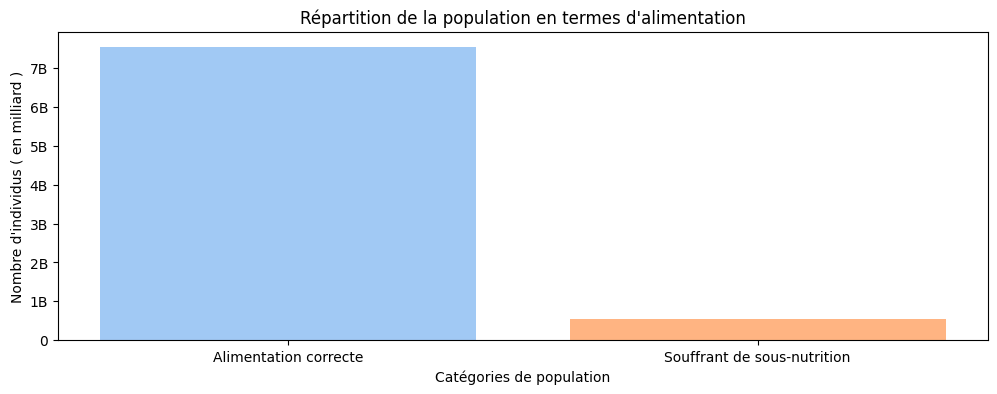

In [ ]:
## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 4)) # Taille
barChart_population = [population_globale, sous_nutrition_globale] # Valeurs

# Gestion des titres
plt.title("Répartition de la population en termes d'alimentation") # Titre
plt.xlabel('Catégories de population') # Titres des abscisses
plt.ylabel("Nombre d'individus ( en milliard )") # Titres des ordonnées
labels = ["Alimentation correcte", "Souffrant de sous-nutrition"] # Titres des labels

# Mise à l'échelle
plt.yticks([0,1000000000,2000000000,3000000000,4000000000,5000000000,6000000000,7000000000],
           ['0','1B','2B','3B','4B','5B','6B','7B'])

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(labels, barChart_population, color=colors)
plt.show()

## Capacité théorique d'alimentation mondiale en 2017

La quantité de calories nécessaire chaque jour à un adulte dépend de nombreux facteurs tels que le sexe, l’âge, la taille, le poids ou le niveau d’activité physique.

Pour un homme adulte, l’apport conseillé en énergie est, en moyenne, de 2 000 à 2 600 calories par jour, selon l’activité. Pour une femme adulte, il est de 1 800 à 2 200 calories.

Indicateur ANC, outils statistiques créé par l'*AFSSA*.

**Source** : *Plus d'informations sur vidal.fr.*

In [ ]:
## Préparation des données relatives à l'année 2017

# Disponibilités alimentaires par zone en 2017
df_disponibilite = dispoAlimentaire.groupby(['zone'])['dispo_kcal/personne/jour'].sum()
# Ajout de la variable Population
df_disponibilite = pd.merge(df_disponibilite,df_population, on='zone', how='left')
# Ré-organisation des variables pour plus de lisibilité
df_disponibilite = df_disponibilite[['zone','population','dispo_kcal/personne/jour']]

## Calcul des informations statistiques complémentaires

# Calcul de la disponibilité calorique globale par pays en 2017
df_disponibilite['dispo_kcal/nation/jour'] = df_disponibilite['population'] * df_disponibilite['dispo_kcal/personne/jour']
# Calcul de la disponibilité calorique mondiale en 2017
dispo_kcal_mondiale = df_disponibilite['dispo_kcal/nation/jour'].sum()
# Calcul des besoins caloriques theoriques mondiaux en 2017
besoin_moyen = 2250
besoin_mondiale = besoin_moyen * population_globale
# Calcul du nombre d'individus pouvant théoriquement être nourris
capacite_totale = dispo_kcal_mondiale / besoin_moyen
# Calcul de la proportion d'individus pouvant théoriquement être nourris
proportion_capacite = round((capacite_totale/population_globale)*100,2)
# Calcul du nombre de calories moyen disponible par personne
part_personne = round((dispo_kcal_mondiale/population_globale),2)

# Aperçu du dataframe
df_disponibilite.head()

,zone,population,dispo_kcal/personne/jour,dispo_kcal/nation/jour
0,Afghanistan,36296000.0,2087.0,7.574975e+10
1,Afrique du Sud,57009000.0,3020.0,1.721672e+11
2,Albanie,2884000.0,3188.0,9.194192e+09
3,Algérie,41389000.0,3293.0,1.362940e+11
4,Allemagne,82658000.0,3503.0,2.895510e+11


In [ ]:
# Formatage des données
dispo_kcal_mondiale_formatee = f"{dispo_kcal_mondiale:,.0f}".replace(",", ".")
besoin_mondiale_formatee = f"{besoin_mondiale:,.0f}".replace(",", ".")
capacite_totale_formatee = f"{capacite_totale:,.0f}".replace(",", ".")

## Résultats
print(f"D'après nos données, la disponibilité calorique mondiale s'élève à environ {dispo_kcal_mondiale_formatee} calories en 2017.")
print(f"Le besoin calorique mondial est estimé à environ {besoin_mondiale_formatee} calories.")
print(f"On aurait donc théoriquement pu nourrir environ {capacite_totale_formatee} individus en 2017.")
print(f"Soit {proportion_capacite}% de la population mondiale, ce qui aurait représenté {part_personne} kcal disponible par personne.")


D'après nos données, la disponibilité calorique mondiale s'élève à environ 20.918.742.801.000 calories en 2017.
Le besoin calorique mondial est estimé à environ 16.973.325.000.000 calories.
On aurait donc théoriquement pu nourrir environ 9.297.219.023 individus en 2017.
Soit 123.24% de la population mondiale, ce qui aurait représenté 2773.01 kcal disponible par personne.


## Capacité théorique d'alimentation végétale mondiale en 2017

In [ ]:
## Préparation des données relatives à l'année 2017

# Disponibilités végétales en 2017
dispo_vegetale = dispoAlimentaire.loc[dispoAlimentaire['origine'] == 'vegetale', :]
# Aggrégation des valeurs par zone
dispo_vegetale = dispo_vegetale.groupby(['zone'])['dispo_kcal/personne/jour'].sum()
# Ajout de la variable Population
df_vegetale = pd.merge(dispo_vegetale, df_population, on='zone', how='left')
# Ré-organisation des variables pour plus de lisibilité
df_vegetale = df_vegetale[['zone','population','dispo_kcal/personne/jour']]

## Calcul des informations statistiques complémentaires

# Calcul des disponibilités caloriques journalières par nation
df_vegetale['dispo_kcal/nation/jour'] = df_vegetale['population'] * df_vegetale['dispo_kcal/personne/jour']
# Calcul des disponibilités caloriques végétales mondiales en 2017
dispo_kcal_vege_mondiale = df_vegetale['dispo_kcal/nation/jour'].sum()
# Calcul du nombre d'individus pouvant théoriquement être nourris avec les produits végétaux en 2017
capacité_totale_vegetale = dispo_kcal_vege_mondiale / besoin_moyen
# Calcul de la proportion d'individus pouvant théoriquement être nourris avec les produits végétaux en 2017
proportion_capacite_vegetale = round((capacité_totale_vegetale/population_globale)*100,2)

# Aperçu du dataframe
df_vegetale.head()

,zone,population,dispo_kcal/personne/jour,dispo_kcal/nation/jour
0,Afghanistan,36296000.0,1871.0,6.790982e+10
1,Afrique du Sud,57009000.0,2533.0,1.444038e+11
2,Albanie,2884000.0,2203.0,6.353452e+09
3,Algérie,41389000.0,2915.0,1.206489e+11
4,Allemagne,82658000.0,2461.0,2.034213e+11


In [ ]:
# Formatage des données
dispo_kcal_vege_mondiale_formatee = f"{dispo_kcal_vege_mondiale:,.0f}".replace(",", ".")
capacité_totale_vegetale_formatee = f"{capacité_totale_vegetale:,.0f}".replace(",", ".")
capacite_totale_formatee = f"{capacite_totale:,.0f}".replace(",", ".")

## Résultats
print(f"D'après nos données, la disponibilité calorique végétale mondiale s'élève à environ {dispo_kcal_vege_mondiale_formatee} calories en 2017.")
print(f"On aurait donc théoriquement pu nourrir environ {capacité_totale_vegetale_formatee} individus en 2017.")
print(f"Soit {proportion_capacite_vegetale}% de la population mondiale.")

D'après nos données, la disponibilité calorique végétale mondiale s'élève à environ  17.260.570.003.000 calories en 2017.
On aurait donc théoriquement pu nourrir environ 7.671.364.446 individus en 2017.
Soit 101.69% de la population mondiale.


## Analyse de l'utilisation des disponibilités intérieures

In [ ]:
## Préparation des données

# Détail des disponibilités alimentaires par zone
df_detail = dispoAlimentaire[['zone','aliments_animaux_kg','autres_utilisations_kg','nourriture_kg','pertes_kg','semences_kg','traitement_kg','dispo_interieure_kg']].groupby(['zone']).sum()

## Calcul des informations statistiques complémentaires

# Calcul des disponibilités totales pour chaque variable
dispo_mondiale = pd.DataFrame(columns=df_detail.columns)
# Ajout des totaux
dispo_mondiale.loc[0] = df_detail.sum()
# Calcul de la disponibilité intérieure totale
dispo_totale = dispo_mondiale['dispo_interieure_kg'].sum()
# Calcul de la proportion utilisée pour nourrir la population
proportion_nourriture = dispo_mondiale['nourriture_kg'].sum() / dispo_totale * 100
# Calcul de la proportion utilisée pour l'alimentation animale
proportion_alimentation_animale = dispo_mondiale['aliments_animaux_kg'].sum() / dispo_totale * 100
# Calcul de la proportion d'aliments perdus
proportion_pertes = dispo_mondiale['pertes_kg'].sum() / dispo_totale * 100

# Aperçu du dataframe
df_detail.head()

,aliments_animaux_kg,autres_utilisations_kg,nourriture_kg,pertes_kg,semences_kg,traitement_kg,dispo_interieure_kg
zone,,,,,,,
Afghanistan,7.680000e+08,4.150000e+08,1.073500e+10,1.135000e+09,3.950000e+08,6.300000e+07,1.351500e+10
Afrique du Sud,5.309000e+09,8.760000e+08,2.981200e+10,2.193000e+09,2.530000e+08,2.281900e+10,6.125600e+10
Albanie,6.600000e+08,1.740000e+08,3.476000e+09,2.760000e+08,5.500000e+07,1.130000e+08,4.758000e+09
Algérie,4.352000e+09,1.707000e+09,3.172900e+10,3.753000e+09,4.490000e+08,6.370000e+08,4.263000e+10
Allemagne,3.020900e+10,7.711000e+09,7.923800e+10,3.781000e+09,1.551000e+09,3.984200e+10,1.622750e+11


In [ ]:
# Formatage des données
dispo_totale_formatee = f"{dispo_totale:,.0f}".replace(",", ".")
dispo_mondiale_formatee = f"{dispo_mondiale['nourriture_kg'].sum():,.0f}".replace(",", ".")
dispo_animal_formatee = f"{dispo_mondiale['aliments_animaux_kg'].sum():,.0f}".replace(",", ".")
dispo_perte_formatee = f"{dispo_mondiale['pertes_kg'].sum():,.0f}".replace(",", ".")

## Résultats
print(f"D'après nos données, la disponibilité intérieure mondiale s'élève à environ {dispo_totale_formatee} kg en 2017.")
print("")
print(f"{dispo_mondiale_formatee} kg sont utilisés pour l'alimentation humaine.")
print(f"Soit {round(proportion_nourriture,2)} %.")
print("")
print(f"{dispo_animal_formatee} kg sont utilisés pour l'alimentation animale.")
print(f"Soit {round(proportion_alimentation_animale,2)} %.")
print("")
print(f"{dispo_perte_formatee} kg sont perdus.")
print(f"Soit {round(proportion_pertes,2)} %.")

D'après nos données, la disponibilité intérieure mondiale s'élève à environ 9.848.994.000.000 kg en 2017.

4.876.258.000.000 kg sont utilisés pour l'alimentation humaine.
Soit 49.51 %.

1.304.245.000.000 kg sont utilisés pour l'alimentation animale.
Soit 13.24 %.

453.698.000.000 kg sont perdus.
Soit 4.61 %.


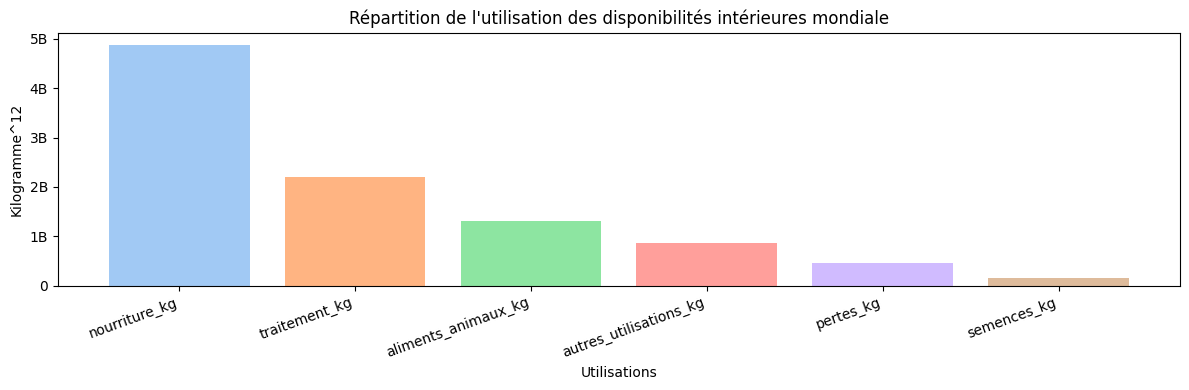

In [ ]:
# Préparation des données
dispo_clean = dispo_mondiale.iloc[0].sort_values(ascending=False)
dispo_clean = dispo_clean.drop('dispo_interieure_kg')

## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 4)) # Taille
variables = dispo_clean.index # Valeurs
observations = dispo_clean.values # Observations

# Gestion des titres
plt.title("Répartition de l'utilisation des disponibilités intérieures mondiale") # Titre
plt.xlabel('Utilisations') # Titres des abscisses
plt.ylabel("Kilogramme^12") # Titres des ordonnées

# Mise à l'échelle et rotation
plt.yticks([0,1e12,2e12,3e12,4e12,5e12], ['0','1B','2B','3B','4B','5B'])
plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(variables, observations, color=colors)
plt.tight_layout() # Ajustements
plt.show()

## Analyse de l'utilisation des céréales

In [ ]:
## Préparation des données

# Liste de tous les produits recensés
liste_global = dispoAlimentaire['produit'].unique()
# Liste des céréales recensés
liste_cereales = ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales']
# Extraction des disponibilités alimentaires en céréales
df_cereales = dispoAlimentaire[dispoAlimentaire['produit'].isin(liste_cereales)].groupby(['produit']).sum(numeric_only=True).reset_index()
# Séléction des variables pertinentes : uniquement les disponibilités intérieures de céréales
df_cereales = df_cereales[['produit','aliments_animaux_kg','autres_utilisations_kg','nourriture_kg','pertes_kg','semences_kg','traitement_kg']]
# Ajout du total des disponibilités par céréale
for index, row in df_cereales.iterrows():
    total = row.drop('produit').sum()
    df_cereales.loc[index, 'total_kg'] = total

## Calcul des informations statistiques complémentaires

# Calcul de la proportion utilisée pour la nourrir la population
df_cereales['alimentation_humaine_%'] = round(df_cereales['nourriture_kg'] / df_cereales['total_kg'] * 100,2)
# Calcul de la proportion utilisée pour la nourrir les animaux
df_cereales['alimentation_animale_%'] = round(df_cereales['aliments_animaux_kg'] / df_cereales['total_kg'] * 100,2)
# Ré-organisation de l'ordre des variables pour plus de lisibilité
df_cereales = df_cereales[['produit','alimentation_humaine_%','alimentation_animale_%','nourriture_kg','aliments_animaux_kg','autres_utilisations_kg','pertes_kg','semences_kg','traitement_kg','total_kg']]
# Calcul de la quantité totale de céréales disponible mondialement
céréale_mondiale = df_cereales['total_kg'].sum()
# Calcul de la quantité totale de céréales utilisée pour l'alimentation humaine
utilisation_humaine = df_cereales['nourriture_kg'].sum()
# Calcul du pourcentage de la quantité totale de céréales utilisée pour l'alimentation humaine
proportion_humaine = round(utilisation_humaine / céréale_mondiale * 100,2)
# Calcul de la quantité totale de céréales utilisée pour l'alimentation animale
utilisation_animale = df_cereales['aliments_animaux_kg'].sum()
# Calcul du pourcentage de la quantité totale de céréales utilisée pour l'alimentation animale
proportion_animale = round(utilisation_animale / céréale_mondiale * 100,2)
# Calcul des quantités globales pour les différentes utilisations de céréales
df_cereales_total = pd.DataFrame(columns=df_cereales.columns)
# Selections des colonnes pertinentes
colonnes_a_supprimer = ['produit','alimentation_humaine_%', 'alimentation_animale_%','total_kg']
df_cereales_total = df_cereales_total.drop(colonnes_a_supprimer, axis=1)
# Ajout des totaux
df_cereales_total.loc[0] = df_cereales.sum()

# Aperçu du dataframe
df_cereales

,produit,alimentation_humaine_%,alimentation_animale_%,nourriture_kg,aliments_animaux_kg,autres_utilisations_kg,pertes_kg,semences_kg,traitement_kg,total_kg
0,Avoine,16.68,69.46,3.903000e+09,1.625100e+10,2.060000e+08,5.140000e+08,2.485000e+09,3.600000e+07,2.339500e+10
1,Blé,67.37,19.08,4.578240e+11,1.296680e+11,2.242400e+10,2.753000e+10,3.428300e+10,7.877000e+09,6.796060e+11
2,Maïs,13.10,57.13,1.251840e+11,5.461160e+11,1.893860e+11,4.070100e+10,6.837000e+09,4.764800e+10,9.558720e+11
3,Millet,77.05,11.06,2.304000e+10,3.306000e+09,1.960000e+08,2.276000e+09,6.820000e+08,4.030000e+08,2.990300e+10
4,Orge,4.84,65.97,6.794000e+09,9.265800e+10,6.540000e+08,4.628000e+09,8.804000e+09,2.691000e+10,1.404480e+11
5,Riz (Eq Blanchi),79.32,7.06,3.772860e+11,3.359400e+10,1.846400e+10,2.737800e+10,1.219400e+10,6.740000e+09,4.756560e+11
6,Seigle,33.21,48.89,5.502000e+09,8.099000e+09,2.000000e+07,5.620000e+08,1.262000e+09,1.120000e+09,1.656500e+10
7,Sorgho,41.47,42.60,2.415300e+10,2.480800e+10,2.049000e+09,2.746000e+09,7.880000e+08,3.695000e+09,5.823900e+10


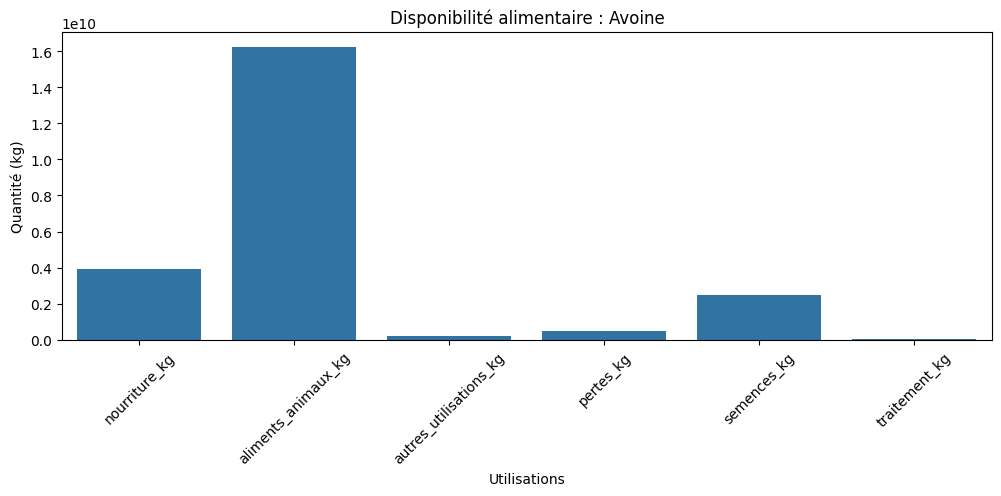

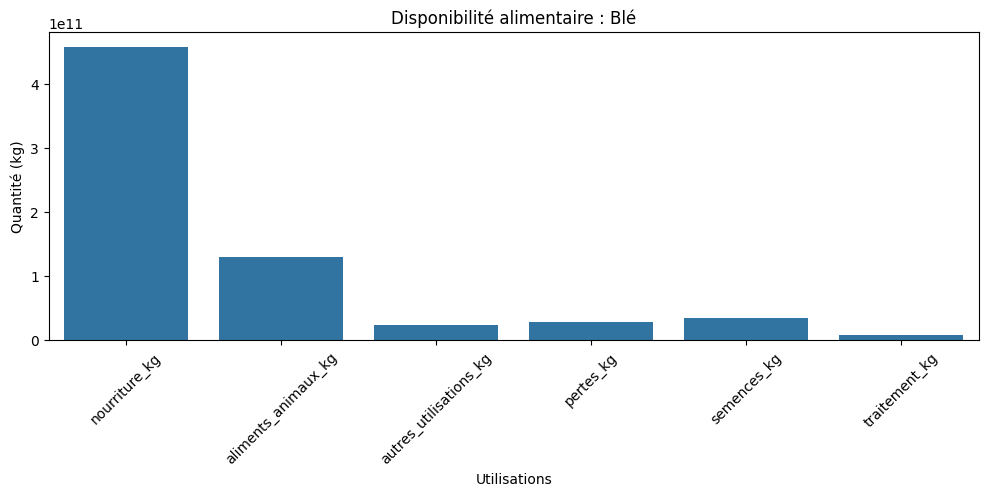

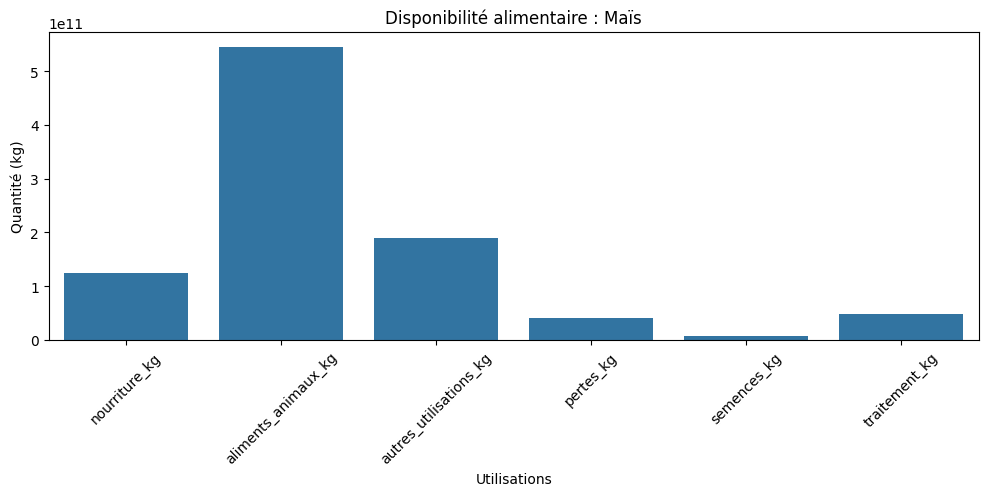

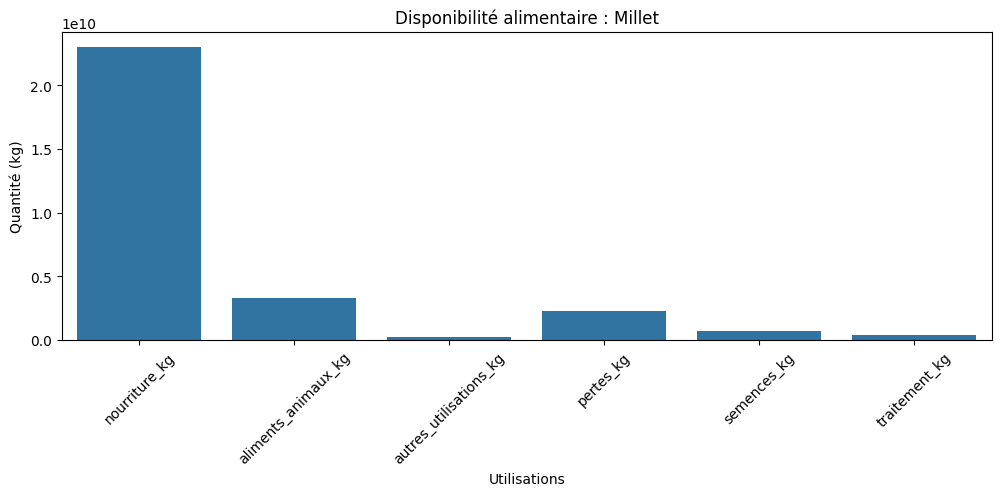

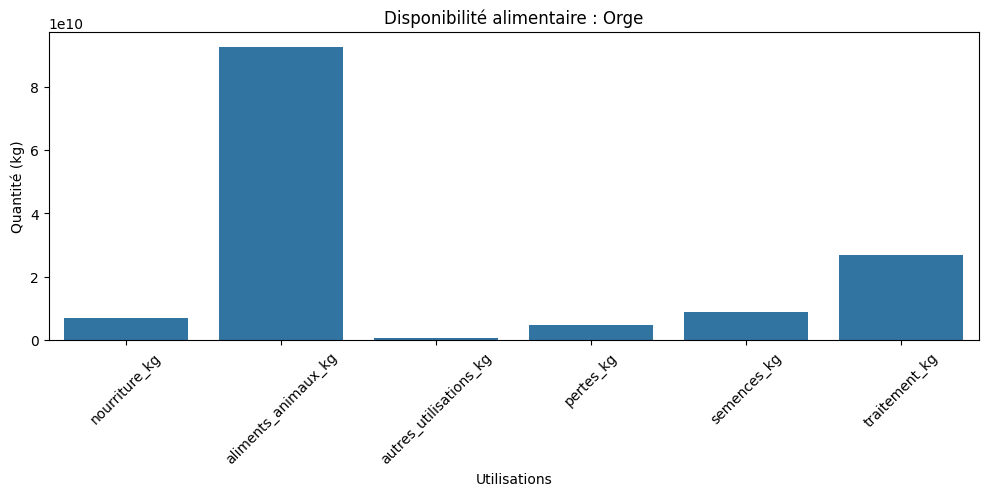

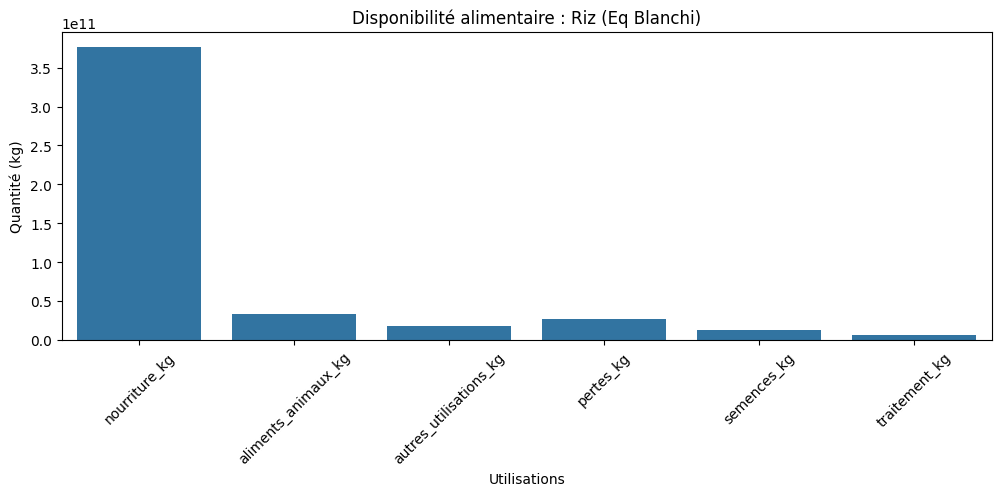

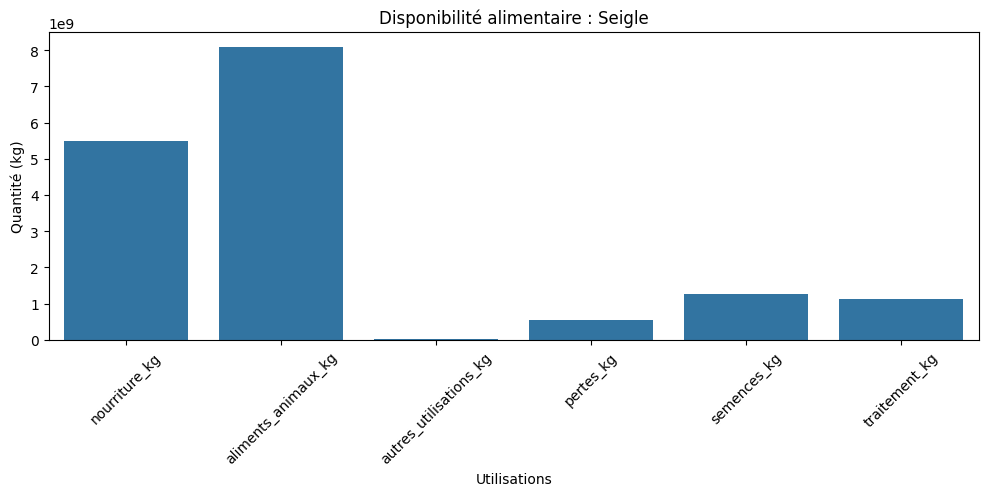

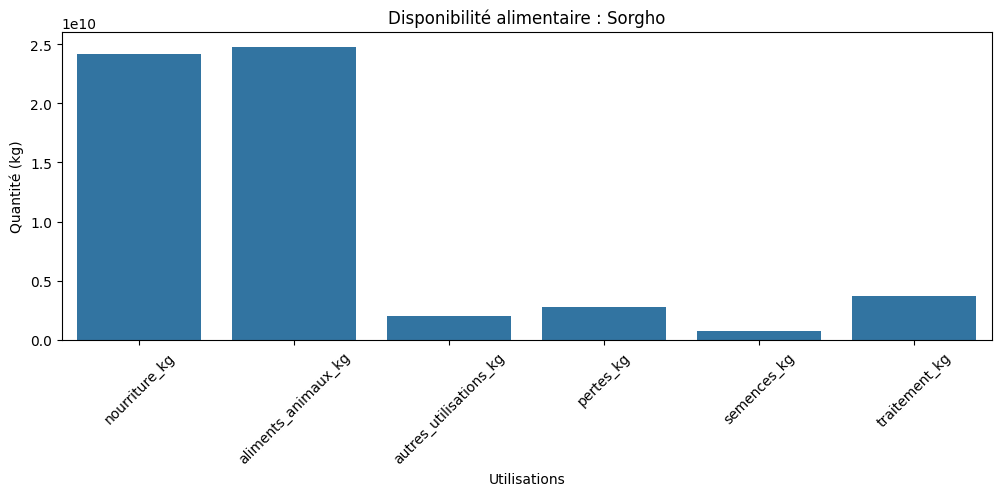

In [ ]:
# Création d'un barplot des utilisations pour chaque produit céréalier
for index, row in df_cereales.iterrows():
    produit = row['produit']
    valeurs = row[['nourriture_kg', 'aliments_animaux_kg', 'autres_utilisations_kg', 'pertes_kg', 'semences_kg', 'traitement_kg']]
    print("")

    # Création des graphiques
    plt.figure(figsize=(12,4))
    sns.barplot(x=valeurs.index, y=valeurs.values)

    # Gestion du titre et des labels
    plt.title(f'Disponibilité alimentaire : {produit}')
    plt.ylabel('Quantité (kg)')
    plt.xlabel('Utilisations')
    plt.xticks(rotation=45)

    # Affichage des graphiques
    plt.show()

In [ ]:
# Formatage des données
céréale_mondiale_formatee = f"{céréale_mondiale:,.0f}".replace(",", ".")
utilisation_humaine_formatee = f"{utilisation_humaine:,.0f}".replace(",", ".")
utilisation_animale_formatee = f"{utilisation_animale:,.0f}".replace(",", ".")

## Résultats
print(f"D'après nos données, la disponibilité de céréales mondiale s'élève à environ {céréale_mondiale_formatee} kg en 2017.")
print("")
print(f"La part affectée à la nutrition humaine est de {utilisation_humaine_formatee} kg en 2017.")
print(f"Soit {proportion_humaine} % des disponibilités.")
print("")
print(f"La part affectée à la nutrition animale est de {utilisation_animale_formatee} kg en 2017.")
print(f"Soit {proportion_animale} % des disponibilités.")

D'après nos données, la disponibilité de céréales mondiale s'élève à environ 2.379.684.000.000 kg en 2017.

La part affectée à la nutrition humaine est de 1.023.686.000.000 kg en 2017.
Soit 43.02 % des disponibilités.

La part affectée à la nutrition animale est de 854.500.000.000 kg en 2017.
Soit 35.91 % des disponibilités.


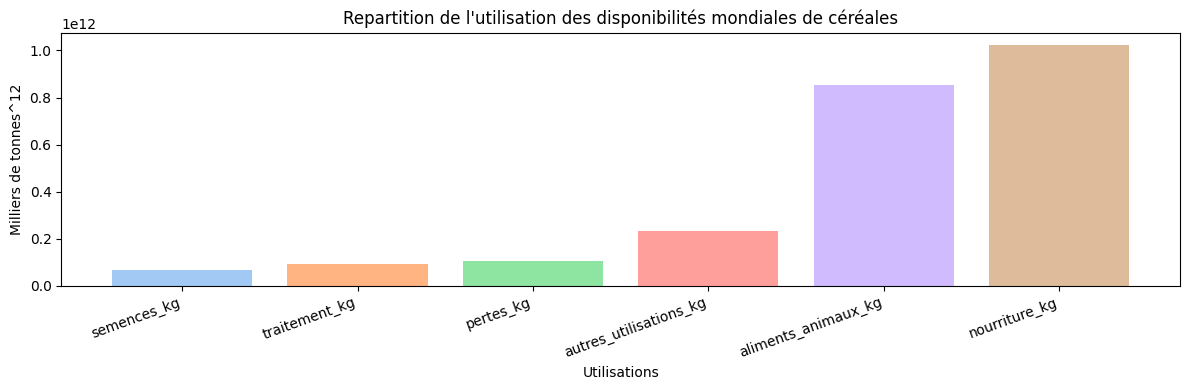

In [ ]:
# Préparation des données - Tri des variables
df_cereales_total = df_cereales_total.iloc[0].sort_values()

## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 4)) # Taille
variables = df_cereales_total.index # Valeurs
observations = df_cereales_total.values # Observations

# Gestion des titres
plt.title("Repartition de l'utilisation des disponibilités mondiales de céréales") # Titre
plt.xlabel('Utilisations') # Titres des abscisses
plt.ylabel("Milliers de tonnes^12") # Titres des ordonnées

# Rotation des labels
plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(variables, observations, color=colors)
plt.tight_layout() # Ajustements
plt.show()

## Liste des pays avec la proportion de population en sous-nutrition la plus forte en 2017

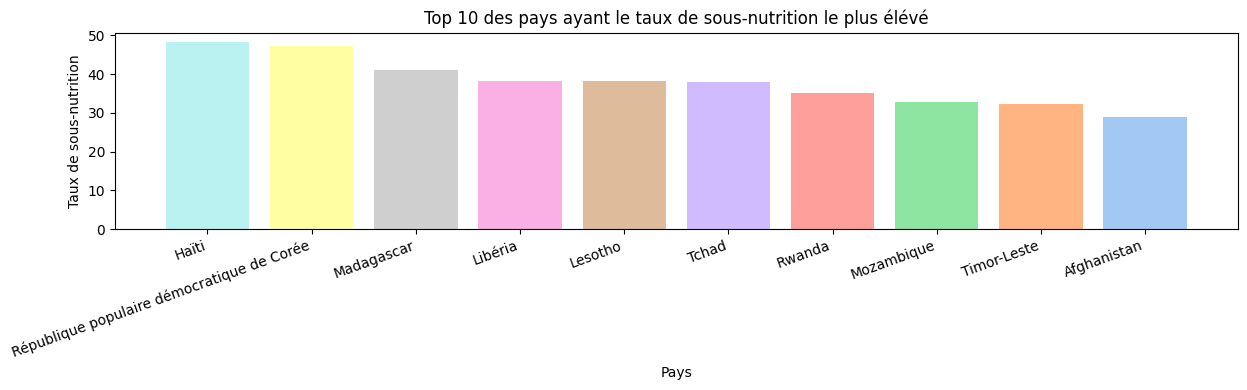

In [ ]:
## Préparation des données
sous_nutrition = sous_nutrition.sort_values(by='pourcentage', ascending=True)

## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 4)) # Taille
variables = sous_nutrition.tail(10)['zone'] # Valeurs
observations = sous_nutrition.tail(10)['pourcentage']  # Observations

# Gestion des titres
plt.title("Top 10 des pays ayant le taux de sous-nutrition le plus élévé") # Titre
plt.xlabel('Pays') # Titres des abscisses
plt.ylabel("Taux de sous-nutrition") # Titres des ordonnées

# Rotation des labels
plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(variables, observations, color=colors)
plt.tight_layout() # Ajustements
plt.gca().invert_xaxis()  # Inversion de l'axe X
plt.show()

In [ ]:
# Affichage sous forme de tableau
sous_nutrition.tail(10).iloc[::-1]

,zone,population,sous_nutrition,pourcentage
78,Haïti,10982000,5300000,48.26
157,République populaire démocratique de Corée,25429000,12000000,47.19
108,Madagascar,25570000,10500000,41.06
103,Libéria,4702000,1800000,38.28
100,Lesotho,2091000,800000,38.26
183,Tchad,15016000,5700000,37.96
161,Rwanda,11980000,4200000,35.06
121,Mozambique,28649000,9400000,32.81
186,Timor-Leste,1243000,400000,32.18
0,Afghanistan,36296000,10500000,28.93


## Liste des pays ayant le plus bénéficié d'aides alimentaires depuis 2013

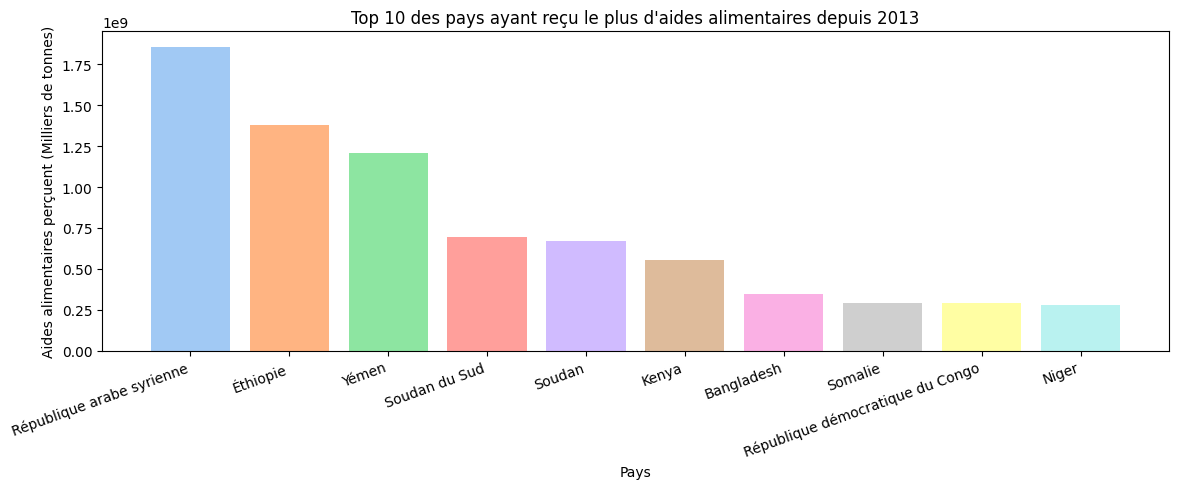

In [ ]:
## Préparation des données

# Aggrégation des aides alimentaires par zone depuis 2013
df_aideAlimentaire = aideAlimentaire.groupby(['zone']).sum(numeric_only=True)
# Triage du dataframe
df_aideAlimentaire = df_aideAlimentaire.sort_values(by='valeur_kg', ascending=False)

## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 5)) # Taille
variables = df_aideAlimentaire.head(10).index # Valeurs
observations = df_aideAlimentaire.head(10)['valeur_kg'] # Observations

# Gestion des titres
plt.title("Top 10 des pays ayant reçu le plus d\'aides alimentaires depuis 2013") # Titre
plt.xlabel('Pays') # Titres des abscisses
plt.ylabel("Aides alimentaires perçuent (Milliers de tonnes)") # Titres des ordonnées

# Rotation des labels
plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(variables, observations, color=colors)
plt.tight_layout() # Ajustements
plt.show()

In [ ]:
# Affichage sous forme de tableau
df_aideAlimentaire.head(10)

,valeur_kg
zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


## Evolution des cinq pays ayant le plus bénéficiés des aides alimentaires entre 2013 et 2016

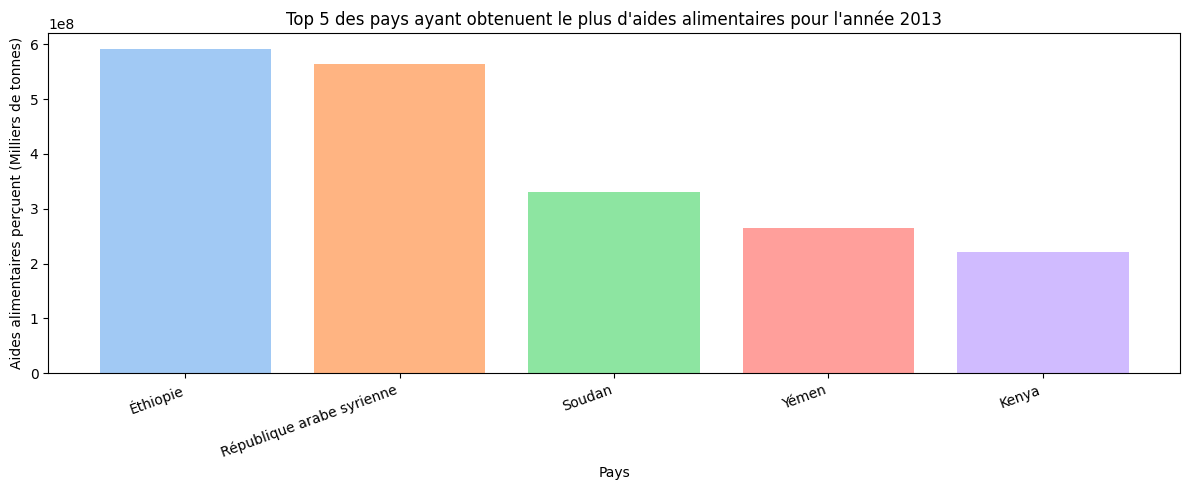

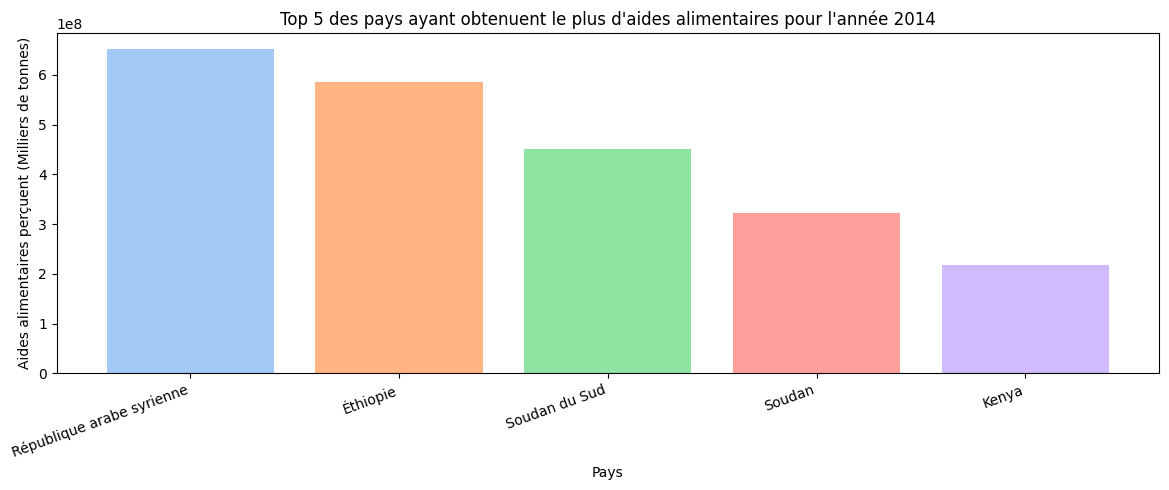

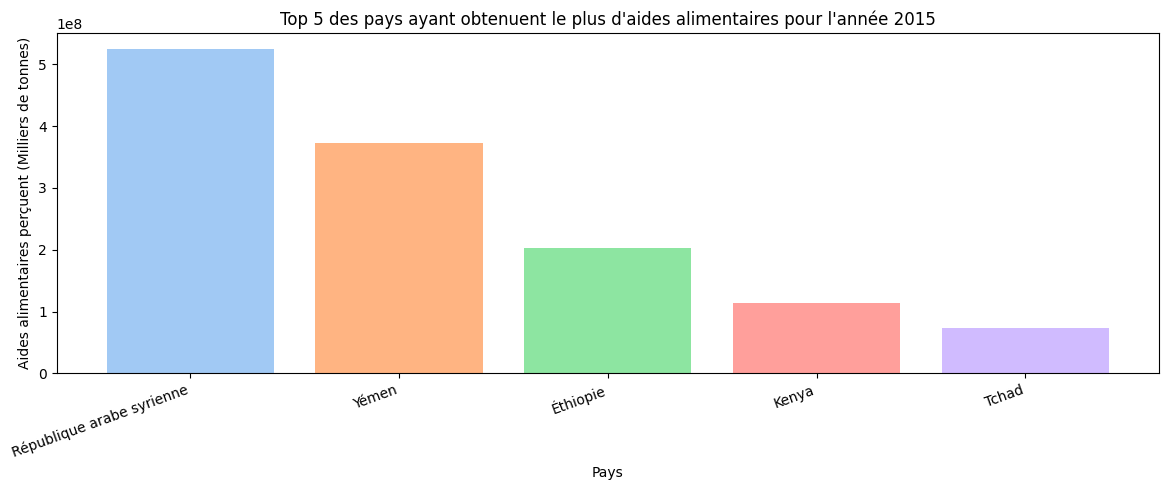

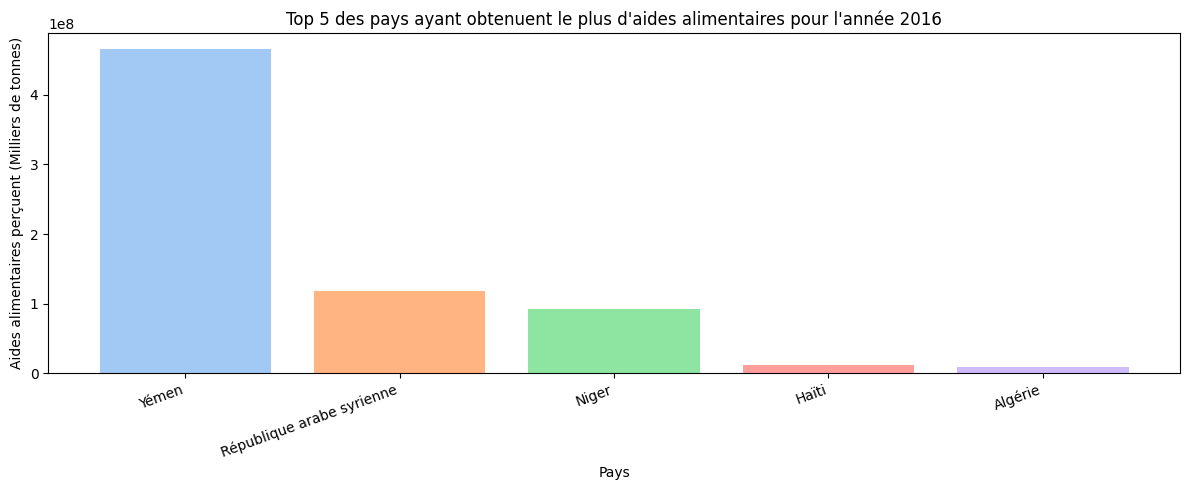

In [ ]:
## Calcul du Top 5 des pays ayant le plus bénéficiés des aides alimentaires par année

## Préparation des données

# Aides alimentaires perçuent par zone et par année
df_alimentaire = aideAlimentaire.groupby(['annee', 'zone']).sum(numeric_only=True)
# Triage par année puis par valeur perçue
df_alimentaire = df_alimentaire.sort_values(by=['annee', 'valeur_kg'], ascending=[True, False])
# Sélection des cinq valeurs les plus fortes par année
flop_5 = df_alimentaire.groupby('annee').head(5)
# Sélection chronologique
annee_unique = flop_5.index.get_level_values('annee').unique()

# Affichage des graphiques par année
for annee in annee_unique:
    print("")

    ## Barcharts
    plt.figure(figsize=(12, 5)) # Taille

    # Préparation des données pour le graphique
    annee_data = flop_5.loc[annee]  # Sélection des données pour l'année spécifique
    variables = annee_data.index.get_level_values('zone') # Valeurs
    observations = annee_data['valeur_kg'] # Observations

    # Gestion des titres
    plt.title(f"Top 5 des pays ayant obtenuent le plus d'aides alimentaires pour l\'année {annee}") # Titre
    plt.xlabel('Pays') # Titres des abscisses
    plt.ylabel("Aides alimentaires perçuent (Milliers de tonnes)") # Titres des ordonnées

    # Rotation des labels
    plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

    # Choix des couleurs
    colors = sns.color_palette("pastel") # Colors

    # Affichage du graphique
    plt.bar(variables, observations, color=colors)
    plt.tight_layout() # Ajustements
    plt.show()

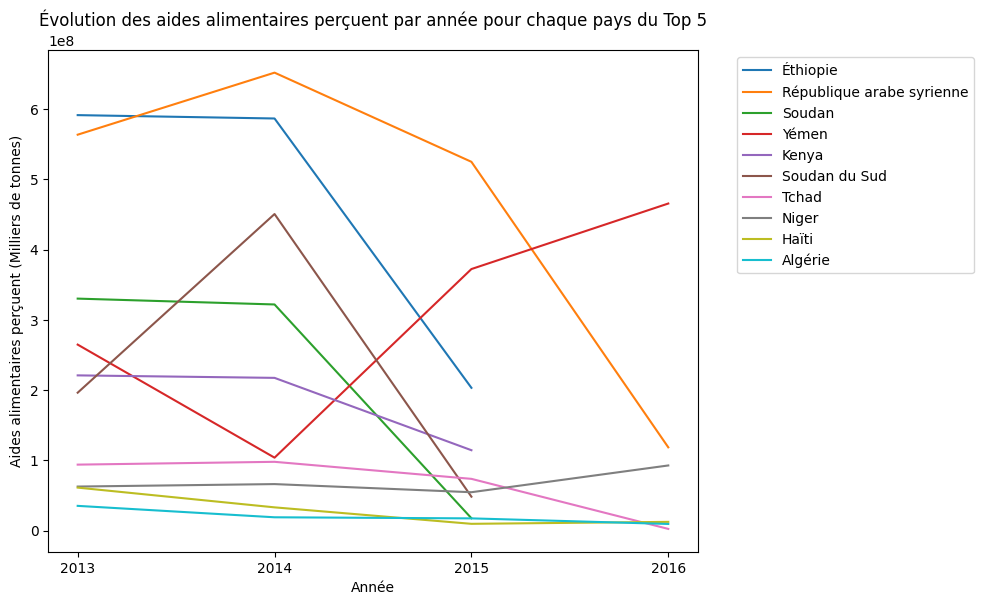

In [ ]:
## Evolution du Top 5 depuis 2013

## Préparation des données

# Liste des pays ayant été dans le top 5 depuis 2013
flop_5_list = flop_5.index.get_level_values('zone').unique()
# Création d'un filtre sélectionnant les pays ayant été dans le top 5 au moins une fois
filtre_flop5 = df_alimentaire[df_alimentaire.index.get_level_values('zone').isin(flop_5_list)]
# Filtrage du dataframe
top5_resultat = filtre_flop5.index.get_level_values('zone').unique()

## Lineplot
plt.figure(figsize=(10, 6)) # Taille

# Pour chaque pays présent dans le Top 5 depuis 2013
for pays in top5_resultat:
  # Préparation des données pour le graphique
  pays_data = filtre_flop5.loc[filtre_flop5.index.get_level_values('zone') == pays] # Sélection des données pour le pays spécifique
  pays_valeur = pays_data['valeur_kg'] # Séléction des valeurs
  pays_annee = pays_data.index.get_level_values('annee') # Séléction de l'année
  plt.plot(pays_annee, pays_valeur, label=pays)

# Gestion des titres, labels et légende
plt.title('Évolution des aides alimentaires perçuent par année pour chaque pays du Top 5') # Titre
plt.xlabel('Année') # Titre des abscisses
plt.xticks(range(min(pays_annee), max(pays_annee) + 1)) # Gestion de l'echelle
plt.ylabel('Aides alimentaires perçuent (Milliers de tonnes)') # Titre des ordonnées
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Gestion de la légende

# Affichage du graphique
plt.tight_layout() # Ajustements
plt.show()


## Liste des pays ayant les plus faibles disponibilités caloriques par habitant et par jour

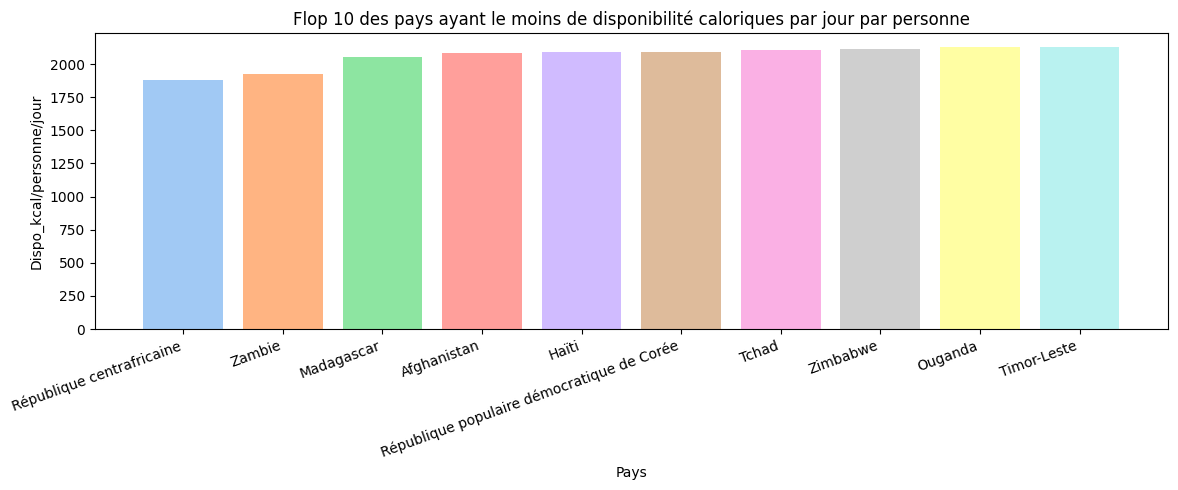

In [ ]:
# Triage du dataframe
df_disponibilite = df_disponibilite.sort_values(by='dispo_kcal/personne/jour', ascending=True)

## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 5)) # Taille
variables = df_disponibilite.head(10)['zone'] # Valeurs
observations = df_disponibilite.head(10)['dispo_kcal/personne/jour'] # Observations

# Gestion des titres
plt.title("Flop 10 des pays ayant le moins de disponibilité caloriques par jour par personne") # Titre
plt.xlabel('Pays') # Titres des abscisses
plt.ylabel("Dispo_kcal/personne/jour") # Titres des ordonnées

# Rotation des labels
plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(variables, observations, color=colors)
plt.tight_layout() # Ajustements
plt.show()

In [ ]:
# Affichage sous forme de tableau
df_disponibilite.drop(columns=['dispo_kcal/nation/jour','population']).head(10)

,zone,dispo_kcal/personne/jour
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


## Liste des pays ayant les plus fortes disponibilités caloriques par habitant et par jour

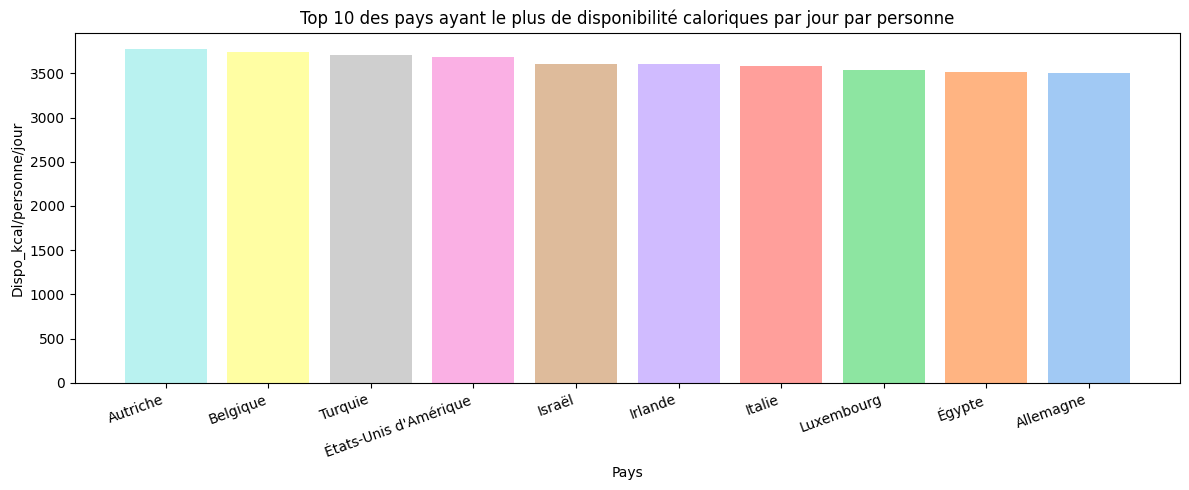

In [ ]:
# Triage du dataframe
df_disponibilite = df_disponibilite.sort_values(by='dispo_kcal/personne/jour', ascending=True)

## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 5)) # Taille
variables = df_disponibilite.tail(10)['zone'] # Valeurs
observations = df_disponibilite.tail(10)['dispo_kcal/personne/jour'] # Observations

# Gestion des titres
plt.title("Top 10 des pays ayant le plus de disponibilité caloriques par jour par personne") # Titre
plt.xlabel('Pays') # Titres des abscisses
plt.ylabel("Dispo_kcal/personne/jour") # Titres des ordonnées

# Rotation des labels
plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(variables, observations, color=colors)
plt.tight_layout() # Ajustements
plt.gca().invert_xaxis()  # Inversion de l'axe X
plt.show()

In [ ]:
# Affichage sous forme de tableau
df_disponibilite.drop(columns=['dispo_kcal/nation/jour','population']).tail(10).iloc[::-1]

,zone,dispo_kcal/personne/jour
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


## Gestion de la disponibilité intérieure : Exemple de la Thaïllande avec le Manioc

In [ ]:
# Calcul de la proportion de population en sous-nutrition en Thaïllande
sous_nutrition_thailand = sous_nutrition[sous_nutrition['zone'] == 'Thaïlande']
sous_nutrition_thailand = sous_nutrition_thailand['pourcentage'].values[0]

# Affichage du résultat
print("Le pourcentage de la population en sous nutrition en thaillande est de {} %".format(sous_nutrition_thailand))

Le pourcentage de la population en sous nutrition en thaillande est de 8.96 %


In [ ]:
## Préparation des données

# Extraction des données relative à la Thaïllande uniquement
dispo_thailand = dispoAlimentaire.loc[dispoAlimentaire['zone'] == 'Thaïlande']
# Extraction des données relative au Manioc seulement
dispo_thailand = dispo_thailand.loc[dispo_thailand['produit'] == 'Manioc',:]
# Sélection des variables pertinentes uniquement
dispo_thailand = dispo_thailand[['production_kg','importations_quantite_kg','exportations_quantite_kg','variation_stock_kg']]
# Apport calorique pour un kilogramme de Manioc
apport_manioc = 1570

## Calculs des informations complémentaires

# Calcul du total de Manioc thaïllandais disponible
thai_total = dispo_thailand['importations_quantite_kg'] + dispo_thailand['production_kg'] - dispo_thailand['exportations_quantite_kg'] + dispo_thailand['variation_stock_kg']
total_manioc = round(thai_total.values[0], 2)
# Calcul de la proportion de production
thai_prod = dispo_thailand['production_kg']
prod_kg = round(thai_prod.values[0], 2)
proportion_prod = prod_kg / total_manioc * 100
# Calcul du pourcentage de manioc importé
thai_import = dispo_thailand['importations_quantite_kg']
import_kg = round(thai_import.values[0], 2)
proportion_import = import_kg / total_manioc * 100
# Calcul du pourcentage exporté
thai_export = dispo_thailand['exportations_quantite_kg']
export_kg = round(thai_export.values[0], 2)
proportion_export = export_kg / total_manioc * 100
# Calcul de la population thailandaise
population_thai = df_population.loc[df_population['zone'] == 'Thaïlande']
# Calcul de la proportion disponible de Manioc par habitant
part_thai = total_manioc / population_thai.values[0][2]
# Calcul de la proportion disponible de Manioc par habitant et par jour
jour_thai = part_thai / 365
# Calcul de la capacité calorique nationale exclusivement basée sur le Manioc
capacité_calorique_manioc = prod_kg * apport_manioc
# Calcul de la capacité nationale potentielle d'alimentation basée sur le Manioc
nutrition_manioc_prod = capacité_calorique_manioc / besoin_moyen
# Calcul du nombre de Thaïllandais potentiellement nourris par le Manioc
nbr_thai_nutrition = nutrition_manioc_prod / population_thai.values[0][2]

# Formatage des données
total_manioc_formatee = f"{total_manioc:,.0f}".replace(",", ".")

## Résultats
print(f"D'après nos données, la disponibilité totale de Manioc Thaïllandais s'élève à environ {total_manioc_formatee} kg en 2017.")
print("")
print("Quantité totale produite : {:,} kilogrammes".format(prod_kg.astype(int)))
print("Soit : {} %".format(proportion_prod.round(2)))
print("")
print("Quantité totale importée : {:,} kilogrammes".format(import_kg.astype(int)))
print("Soit : {} %".format(proportion_import.round(2)))
print("")
print("Quantité totale exportée : {:,} kilogrammes".format(export_kg.astype(int)))
print("Soit : {} %".format(proportion_export.round(2)))
print("")
print("La population thailandaise est composée de {:,} individus".format(population_thai.values[0][2]))
print("")
print("Soit : {:,} kg par personne.".format(part_thai.round(2)))
print("")
print("Soit : {:,} kg par jour.".format(jour_thai.round(2)))
print("")
print("On pourrait donc théoriquement nourrir {:,} individus avec le Manioc produit en Thaïlande.".format(nutrition_manioc_prod.astype(int)))
print("")
print("Soit {:,} fois la population Thaïlandaise.".format(nbr_thai_nutrition.astype(int)))


D'après nos données, la disponibilité totale de Manioc Thaïllandais s'élève à environ 6.264.000.000 kg en 2017.

Quantité totale produite : 30,228,000,000 kilogrammes
Soit : 482.57 %

Quantité totale importée : 1,250,000,000 kilogrammes
Soit : 19.96 %

Quantité totale exportée : 25,214,000,000 kilogrammes
Soit : 402.52 %

La population thailandaise est composée de 69,209,000 individus

Soit : 90.51 kg par personne.

Soit : 0.25 kg par jour.

On pourrait donc théoriquement nourrir 21,092,426,666 individus avec le Manioc produit en Thaïlande.

Soit 304 fois la population Thaïlandaise.


In [ ]:
# Calcul de la balance commerciale ( Exportations - Importations )
balance_commerciale = export_kg - import_kg
balance_pourcentage = balance_commerciale / total_manioc * 100

# Résultats
print("La balance commerciale thailandaise relative au Manioc s'élève à {:,} kilogrammes.".format(balance_commerciale.astype(int)))
print("Soit {:,} % de la disponibilité intérieure nationale.".format(balance_pourcentage.astype(int)))

La balance commerciale thailandaise relative au Manioc s'élève à 23,964,000,000 kilogrammes.
Soit 382 % de la disponibilité intérieure nationale.


## Gestion de la disponibilité intérieure : Exemple de l'Inde et des pertes alimentaires

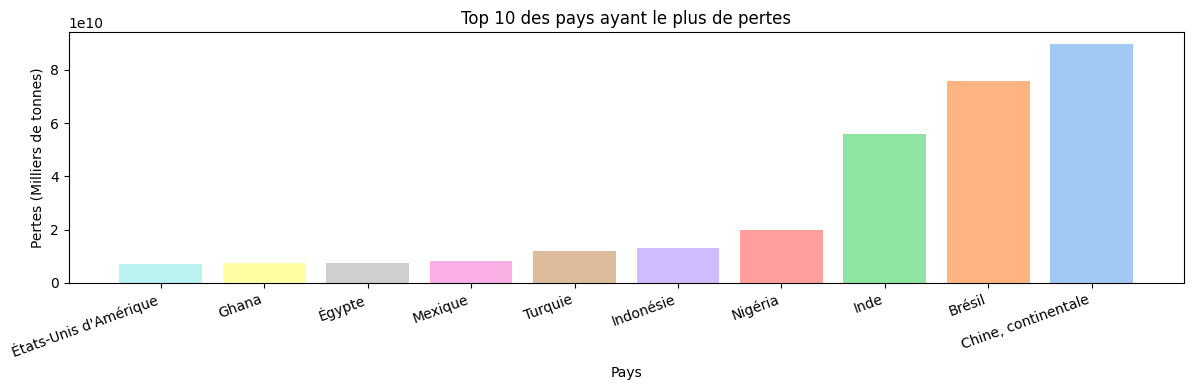

In [ ]:
## Préparation des données

# Calcul des pertes alimentaires
perdition = dispoAlimentaire.groupby(['zone'])['pertes_kg'].sum().reset_index()
# Triage des valeurs dans l'ordre décroissant
perdition = perdition.sort_values(by='pertes_kg', ascending=False)

## Barcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 4)) # Taille
variables = perdition.head(10)['zone'] # Valeurs
observations = perdition.head(10)['pertes_kg'] # Observations

# Gestion des titres
plt.title("Top 10 des pays ayant le plus de pertes") # Titre
plt.xlabel('Pays') # Titres des abscisses
plt.ylabel("Pertes (Milliers de tonnes)") # Titres des ordonnées

# Rotation des labels
plt.xticks(rotation=20, ha='right') # Rotation des titres en abscisses

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.bar(variables, observations, color=colors)
plt.tight_layout() # Ajustements
plt.gca().invert_xaxis()  # Inversion de l'axe X
plt.show()

In [ ]:
## Calculs des informations complémentaires

# Calcul de la proportion de population en sous-nutrition en Chine
chipre = sous_nutrition[sous_nutrition['zone'] == 'Chine, continentale']
chipre = chipre['pourcentage'].values[0]
# Calcul de la proportion de population en sous-nutrition au Brésil
perbres = sous_nutrition[sous_nutrition['zone'] == 'Brésil']
perbres = perbres['pourcentage'].values[0]
# Calcul de la proportion de population en sous-nutrition en Inde
perind = sous_nutrition[sous_nutrition['zone'] == 'Inde']
perind = perind['pourcentage'].values[0]
# Calcul de la proportion de population en sous-nutrition en Nigéria
nig = sous_nutrition[sous_nutrition['zone'] == 'Nigéria']
nig = nig['pourcentage'].values[0]

## Résultats
print("La part de la population en sous nutrition au Chine est de {} %".format(chipre))
print("La part de la population en sous nutrition au Brésil est de {} %".format(perbres))
print("La part de la population en sous nutrition en Inde est de {} %".format(perind))
print("La part de la population en sous nutrition en Nigéria est de {} %".format(nig))

La part de la population en sous nutrition au Chine est de 0.0 %
La part de la population en sous nutrition au Brésil est de 0.0 %
La part de la population en sous nutrition en Inde est de 14.2 %
La part de la population en sous nutrition en Nigéria est de 11.95 %
